In [236]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from pprint import pprint
import urllib
from random import uniform

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [237]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
pprint(cities)

587
['ushuaia',
 'tuktoyaktuk',
 'kirakira',
 'caceres',
 'hithadhoo',
 'north bend',
 'luganville',
 'nome',
 'bluff',
 'aklavik',
 'atuona',
 'norman wells',
 'khatanga',
 'cidreira',
 'mataura',
 'faanui',
 'kapaa',
 'miri',
 'port-cartier',
 'geraldton',
 'severo-kurilsk',
 'katsuura',
 'lac du bonnet',
 'nizwa',
 'eskasem',
 'albany',
 'hutchinson',
 'hare bay',
 'norrtalje',
 'samana',
 'ilulissat',
 'torbay',
 'burica',
 'anadyr',
 'itoman',
 'arman',
 'luena',
 'port alfred',
 'cape town',
 'kushmurun',
 'husavik',
 'busselton',
 'hilo',
 'castro',
 'saskylakh',
 'luderitz',
 'rognan',
 'codrington',
 'tahoua',
 'sabang',
 'bamako',
 'upernavik',
 'arraial do cabo',
 'sitka',
 'ahuimanu',
 'longyearbyen',
 'nizhneyansk',
 'olafsvik',
 'mar del plata',
 'amderma',
 'puerto baquerizo moreno',
 'lolua',
 'lisakovsk',
 'fuente de oro',
 'tasbuget',
 'dikson',
 'russell',
 'mokrous',
 'qaanaaq',
 'jumla',
 'nikolskoye',
 'mahebourg',
 'jamestown',
 'pevek',
 'chokurdakh',
 'saint-ph

In [238]:
# Make a df to add data from API and drop any duplicates
cities_df = pd.DataFrame({'City': cities})
cities_df.drop_duplicates(subset='City')
cities_df

,City
0,ushuaia
1,tuktoyaktuk
2,kirakira
3,caceres
4,hithadhoo
5,north bend
6,luganville
7,nome
8,bluff
9,aklavik


## Perform API Calls

In [241]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key



column_names = ["City", "Country", "Date", "Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]

city_weather = pd.DataFrame(columns=column_names)

# Loop through cities using a count and add data to df 

count_row = 1
count_set = 1

print("Let The Data Retrieval Begin!")

for index, city in enumerate(cities):    
    if (index % 50 == 0 and index >= 50):
        count_set += 1
        count_row = 0
        
        
    #urllib.request.pathname2url(path)Convert the pathname path from the local syntax for a path to the form used in the path component of a URL. 
    city_url = url + "&q=" + urllib.request.pathname2url(city)
    
    print("Processing: Record %s of Set %s | %s" % (count_row, count_set, city))
    print(city_url)
    
    count_row += 1
    
    try:
        city_response = requests.get(city_url).json() 
    
        city_weather.set_value(index, 'City', city_response["name"])
        city_weather.set_value(index, 'Country', city_response["sys"]["country"])
        city_weather.set_value(index, 'Date', city_response["dt"])
        city_weather.set_value(index, 'Temperature (F)', city_response["main"]["temp"])
        city_weather.set_value(index, 'Humidity (%)', city_response["main"]["humidity"])
        city_weather.set_value(index, 'Cloudiness (%)', city_response["clouds"]["all"])
        city_weather.set_value(index, 'Wind Speed (mph)', city_response["wind"]["speed"])
        city_weather.set_value(index, 'Latitude', city_response["coord"]["lat"])
        city_weather.set_value(index, 'Longitude', city_response["coord"]["lon"])
        
    except:
        print("Must Be a Black Hole... City not found.")
        pass
    
print("-----------------------------")
print("Data Retrieval Complete      ")

    

Let The Data Retrieval Begin!
Processing: Record 1 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=ushuaia
Processing: Record 2 of Set 1 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=tuktoyaktuk
Processing: Record 3 of Set 1 | kirakira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=kirakira
Processing: Record 4 of Set 1 | caceres
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=caceres


/Users/Ali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/Ali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/Ali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/Ali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/Ali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Processing: Record 5 of Set 1 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=hithadhoo
Processing: Record 6 of Set 1 | north bend
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=north%20bend
Processing: Record 7 of Set 1 | luganville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=luganville
Processing: Record 8 of Set 1 | nome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=nome
Processing: Record 9 of Set 1 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=bluff
Processing: Record 10 of Set 1 | aklavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=aklavik
Processing: Record 11 of Set 1 | atuona
http://api.openweathermap.org/data/2.5/weathe

Must Be a Black Hole... City not found.
Processing: Record 7 of Set 2 | olafsvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=olafsvik
Must Be a Black Hole... City not found.
Processing: Record 8 of Set 2 | mar del plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=mar%20del%20plata
Processing: Record 9 of Set 2 | amderma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=amderma
Must Be a Black Hole... City not found.
Processing: Record 10 of Set 2 | puerto baquerizo moreno
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=puerto%20baquerizo%20moreno
Processing: Record 11 of Set 2 | lolua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=lolua
Must Be a Black Hole... City not found.
Processing: Record 12 of Set 2 | 

Processing: Record 9 of Set 3 | guilin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=guilin
Processing: Record 10 of Set 3 | godo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=godo
Processing: Record 11 of Set 3 | smithers
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=smithers
Processing: Record 12 of Set 3 | mugango
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=mugango
Processing: Record 13 of Set 3 | lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=lorengau
Processing: Record 14 of Set 3 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=yellowknife
Processing: Record 15 of Set 3 | elat
http://api.openweathermap.org/data/2.5/weather?

Processing: Record 14 of Set 4 | pochutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=pochutla
Processing: Record 15 of Set 4 | elk point
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=elk%20point
Processing: Record 16 of Set 4 | nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=nanortalik
Processing: Record 17 of Set 4 | piranshahr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=piranshahr
Processing: Record 18 of Set 4 | ha tinh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=ha%20tinh
Processing: Record 19 of Set 4 | saleaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=saleaula
Must Be a Black Hole... City not found.
Processing: Record 20 of

Processing: Record 17 of Set 5 | zvishavane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=zvishavane
Processing: Record 18 of Set 5 | shimoda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=shimoda
Processing: Record 19 of Set 5 | iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=iqaluit
Processing: Record 20 of Set 5 | shingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=shingu
Processing: Record 21 of Set 5 | abu samrah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=abu%20samrah
Processing: Record 22 of Set 5 | basco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=basco
Processing: Record 23 of Set 5 | tasiilaq
http://api.openweathermap.org/data/2.5

Processing: Record 19 of Set 6 | vitimskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=vitimskiy
Must Be a Black Hole... City not found.
Processing: Record 20 of Set 6 | okhotsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=okhotsk
Processing: Record 21 of Set 6 | japura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=japura
Processing: Record 22 of Set 6 | tsihombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=tsihombe
Must Be a Black Hole... City not found.
Processing: Record 23 of Set 6 | gold coast
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=gold%20coast
Processing: Record 24 of Set 6 | casper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=caspe

Processing: Record 22 of Set 7 | derzhavinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=derzhavinsk
Processing: Record 23 of Set 7 | subang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=subang
Processing: Record 24 of Set 7 | praya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=praya
Processing: Record 25 of Set 7 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=georgetown
Processing: Record 26 of Set 7 | falealupo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=falealupo
Must Be a Black Hole... City not found.
Processing: Record 27 of Set 7 | necochea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=necochea
Processing: Record 28 of Set 7 | k

Processing: Record 27 of Set 8 | roald
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=roald
Processing: Record 28 of Set 8 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=lavrentiya
Processing: Record 29 of Set 8 | karratha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=karratha
Processing: Record 30 of Set 8 | nevinnomyssk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=nevinnomyssk
Processing: Record 31 of Set 8 | margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=margate
Processing: Record 32 of Set 8 | tezu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=tezu
Processing: Record 33 of Set 8 | dukat
http://api.openweathermap.org/data/2.5/we

Processing: Record 32 of Set 9 | meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=meulaboh
Processing: Record 33 of Set 9 | kilindoni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=kilindoni
Processing: Record 34 of Set 9 | strai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=strai
Must Be a Black Hole... City not found.
Processing: Record 35 of Set 9 | isabela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=isabela
Processing: Record 36 of Set 9 | canon city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=canon%20city
Processing: Record 37 of Set 9 | artyk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=artyk
Must Be a Black Hole... City not found.
Pr

Processing: Record 34 of Set 10 | tirana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=tirana
Processing: Record 35 of Set 10 | auki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=auki
Processing: Record 36 of Set 10 | galiwinku
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=galiwinku
Must Be a Black Hole... City not found.
Processing: Record 37 of Set 10 | tocopilla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=tocopilla
Processing: Record 38 of Set 10 | maykain
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=maykain
Must Be a Black Hole... City not found.
Processing: Record 39 of Set 10 | nevelsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=nevelsk
Pr

Processing: Record 38 of Set 11 | cheuskiny
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=cheuskiny
Must Be a Black Hole... City not found.
Processing: Record 39 of Set 11 | taburi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=taburi
Must Be a Black Hole... City not found.
Processing: Record 40 of Set 11 | northam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=northam
Processing: Record 41 of Set 11 | chapada dos guimaraes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=chapada%20dos%20guimaraes
Processing: Record 42 of Set 11 | la rioja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b9a7f2e3bdad98653d33880777d7f&q=la%20rioja
Processing: Record 43 of Set 11 | bagotville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd8b

In [242]:
city_weather.count()

City                533
Country             533
Temperature (F)     533
Latitude            533
Longitude           533
Humidity (%)        533
Cloudiness (%)      533
Wind Speed (mph)    533
Date                533
dtype: int64

In [243]:
city_weather.head(5)

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,Ushuaia,AR,36.39,-54.81,-68.31,100,0,13.87,1.533996e+09
1,Tuktoyaktuk,CA,39.2,69.44,-133.03,80,90,14.99,1.533997e+09
2,Kirakira,SB,80.59,-10.46,161.92,100,92,17.25,1.534000e+09
3,Caceres,CO,78.43,5.53,-74.53,58,0,1.59,1.534000e+09
4,Hithadhoo,MV,83.56,-0.6,73.08,100,100,9.42,1.534000e+09


In [244]:
city_weather.to_csv(output_data_file, index_label = "cities.csv")

In [260]:
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict

cmaps = OrderedDict()

ModuleNotFoundError: No module named 'colorspacious'

In [261]:
lat= city_weather['Latitude']
temp = city_weather['Temperature (F)']
humid = city_weather['Humidity (%)']
clouds = city_weather['Cloudiness (%)']
wind = city_weather['Wind Speed (mph)']

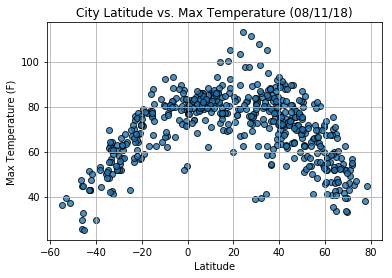

In [262]:
plt.scatter(lat,temp, edgecolor='black', linewidths=1, cmap='cool', marker="o", alpha=0.8)

# Incorporate the other graph properties

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

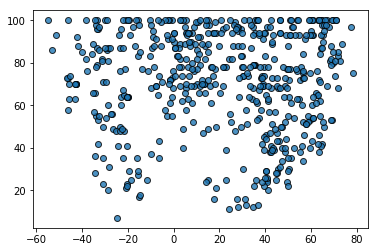

In [263]:
plt.scatter(lat,humid, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label=cities)

plt.title("City Latitude vs. Himidity (%s)" % time.strftime("%x"))
plt.ylabel("Himidity (%s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


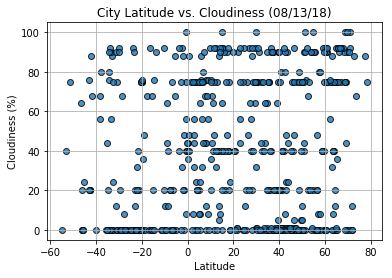

In [265]:

plt.scatter(lat,clouds,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")


plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig3.png")
